# OCR Label Detection

This is a demonstration of the image_str module, which allows you to find and identify specific labels on the International Space Station (ISS).

By providing a folder containing images or a specific image taken from the ISS panorama, image_str will analyze the image and generate a pandas dataframe that includes all the labels found in the images. If you specify a result folder, a CSV file will be created, containing the labels and boundary boxes for each individual image. If you also provide a bagfile path associated with the images, the module will generate the 3D positions of each label. Additionally, a CSV file named "all_locations.csv" will be created, containing all the labels found in the images.

Alternatively, if you already have a generated CSV file, you can use it to construct a dataframe for label searching purposes.

## Setup

In [1]:
from image_str.parse_img import Ocr
from matplotlib import pyplot as plt
import warnings
import pandas as pd
import os

warnings.filterwarnings('ignore')

Set the bagfile path of the ISS images. If no path is given, then the 3D location of the labels on the ISS would not be provided.

In [2]:
bag_path = "data/images/queen/"

Set Astrobee Variables

In [ ]:
os.environ["ASTROBEE_CONFIG_DIR"] = "/src/astrobee/src/astrobee/config"
os.environ["ASTROBEE_RESOURCE_DIR"] = "/src/astrobee/src/astrobee/resources"
os.environ["ASTROBEE_ROBOT"] = "queen"
os.environ["ASTROBEE_WORLD"] = "iss"

## Set Image Path or Folder

In [ ]:
# Make sure the image_path and the image_folder is within a folder with the name of the astrobee (ie. queen)
image_path = 'data/images/queen/isaac_sci_cam_image_delayed/1657544487.355.jpg'
image_folder = 'data/images/queen/isaac_sci_cam_image_delayed/'

## Set Result Folder

The result folder is where the results will be saved. If no result folder is provided, the dataframe and images will not be saved to files.

In [ ]:
result_folder = 'results/queen/' 

## Create ocr Object

The Ocr class is the interface in which we can parse through images and search for labels. There are three ways to create an useful instance of Ocr. 

1. Create an instance of Ocr and pass in the craft trained model and the bag path (recommended). Call the parse_folder function with the path to the ISS image folder.
2. Same as 1 but instead of calling parse_folder, call parse_image if you only have one image to search.
3. If an csv file exists with the necessary columns (label, PCL Intersection, Mesh Intersection, image, and location), you can create the instance using Ocr.df_from_file.

In [3]:
ocr = Ocr(bag_path=bag_path)

Downloading...
From: https://drive.google.com/uc?id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ
To: /home/analyst/craft_mlt_25k.pth
100%|██████████| 83.2M/83.2M [00:07<00:00, 11.1MB/s]
Downloading: "https://github.com/baudm/parseq/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/baudm/parseq/releases/download/v1.0.0/parseq-bb5792a6.pt" to /root/.cache/torch/hub/checkpoints/parseq-bb5792a6.pt
100%|██████████| 91.0M/91.0M [00:09<00:00, 9.55MB/s]


In [ ]:
ocr.parse_image(image_path, result_folder=result_folder, increment=True)

In [ ]:
# Queen Dataset (Bays 1, 2, and 3)
ocr.parse_folder(image_folder, result_folder=result_folder, increment=True)

If a final file is passed in, parse_folder will append results to the final folder.

In [ ]:
# Bumble Dataset (Bays 4, 5, and 6)
os.environ["ASTROBEE_ROBOT"] = "bumble"
image_folder = 'data/images/bumble/isaac_sci_cam_image_delayed/'
result_folder = 'results/bumble/' 
result_file = 'results/test.csv'
bag_path = "data/images/bumble/"
ocr.set_bag_path(bag_path)

ocr.parse_folder(image_folder, result_folder=result_folder, increment=False, final_file=result_file)

If csv file is provided, generate dataframe directly.

In [2]:
ocr = Ocr.df_from_file('results/all_locations_final.csv')

Found Craft Model


Downloading: "https://github.com/baudm/parseq/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://github.com/baudm/parseq/releases/download/v1.0.0/parseq-bb5792a6.pt" to /root/.cache/torch/hub/checkpoints/parseq-bb5792a6.pt
100%|██████████| 91.0M/91.0M [00:11<00:00, 8.57MB/s]


## Find Specific Label

Given the dataframe, you can search for a specific label. find_label(label, display) will create an interactive interface that displays the location of the label on the ISS and a link to view the label in the panorama. If label is true, the image and cropped label will be displayed.

**Set jupyter equal to True when running in Jupyter Notebook**

**The function will throw an error if the images are not located in the path specified either in the CSV file or the original location the image_str module parsed the images from.**

Searching for Fire Port: 100%|██████████| 132/132 [00:00<00:00, 246.41it/s]


Button(description='Prev', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

interactive(children=(Textarea(value='Image: 1/91\nhttps://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=t…

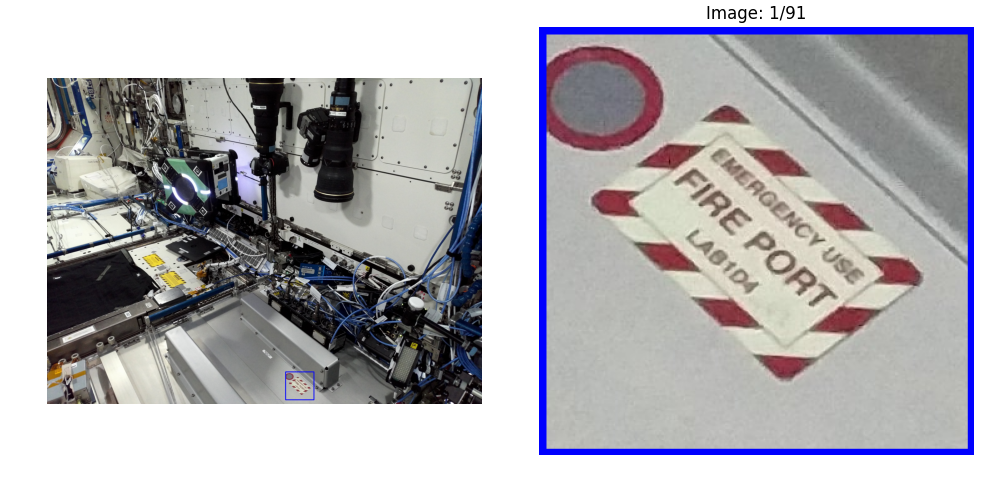

In [6]:
%matplotlib widget
label = 'Fire Port'
ocr.find_label(label, True, jupyter=True)

In [4]:
%matplotlib widget
label = 'Fire Port'
ocr.find_label(label, False, jupyter=True)

Searching for Fire Port: 100%|██████████| 132/132 [00:00<00:00, 264.67it/s]


Button(description='Prev', style=ButtonStyle())

Button(description='Next', style=ButtonStyle())

interactive(children=(Textarea(value='Image: 1/91\nhttps://ivr.ndc.nasa.gov/isaac_panos/pannellum.htm?config=t…